In [1]:
import os

# Define the repository and the target directory
repo_url = 'https://github.com/kurchi1205/era-cifar-training-s11'
target_dir = 'era-cifar-training-s11'

# Check if the directory already exists
if not os.path.exists(target_dir):
    # If it doesn't exist, clone the repo
    !git clone {repo_url}
else:
    # If it exists, 'cd' into the directory and pull the latest changes
    %cd {target_dir}
    !git pull
    %cd ..
%cd {target_dir}
%pip install -r requirements.txt
# Add the repository's directory to the system path
import sys
sys.path.append(target_dir)

/content/era-cifar-training-s11
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), 960 bytes | 960.00 KiB/s, done.
From https://github.com/kurchi1205/era-cifar-training-s11
   f6cb568..14ac326  main       -> origin/main
Updating f6cb568..14ac326
Fast-forward
 main.py  | 27 ++-------------------------
 utils.py | 42 ++++++++++++++++++++++++++++++++++++++++--
 2 files changed, 42 insertions(+), 27 deletions(-)
/content
/content/era-cifar-training-s11


In [2]:
from main import *

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
train_ds, test_ds = get_data()
train_loader = get_dataloader(train_ds, 512)
test_loader = get_dataloader(test_ds, 512)
infer_loader = get_dataloader(test_ds, 1, 1)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [12]:
model = get_model()
get_model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.26E-01


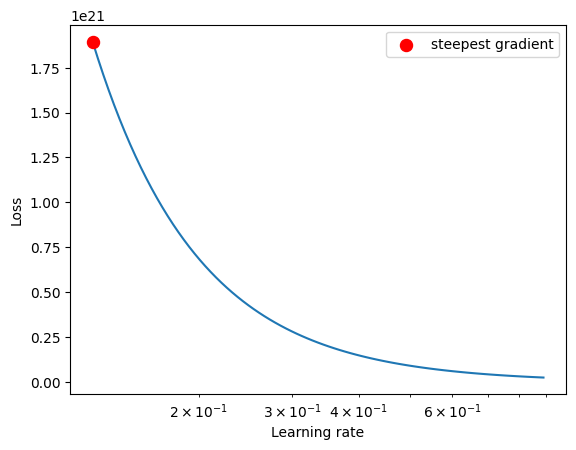

In [ ]:
optimizer = get_optimizer(model, lr=0.1, optimizer_type="adam")
get_lr(model, optimizer, train_loader, test_loader, num_iter=100)

In [13]:
epochs = 20
max_lr = 1.26e-01
optimizer = get_optimizer(model, lr=0.1, optimizer_type="adam")
scheduler = get_scheduler(train_loader, optimizer, epochs, max_lr, div_factor=10, final_div_factor=100, three_phase=True)

In [14]:
train_losses, test_losses, train_acc, test_acc = train_model(epochs=epochs, model=model, train_loader=train_loader, \
            test_loader=test_loader, optimizer=optimizer, scheduler=None)

EPOCH: 0


  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=1.7864068746566772 Batch_id=97 Accuracy=24.85: 100%|██████████| 98/98 [00:42<00:00,  2.30it/s]



Test set: Average loss: 1.8818, Accuracy: 3289/10000 (32.89%)

EPOCH: 1


Loss=1.4295237064361572 Batch_id=97 Accuracy=40.81: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 1.4874, Accuracy: 4495/10000 (44.95%)

EPOCH: 2


Loss=1.394523024559021 Batch_id=97 Accuracy=48.48: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]



Test set: Average loss: 1.4080, Accuracy: 4924/10000 (49.24%)

EPOCH: 3


Loss=1.1794413328170776 Batch_id=97 Accuracy=54.55: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]



Test set: Average loss: 1.2250, Accuracy: 5621/10000 (56.21%)

EPOCH: 4


Loss=0.978762149810791 Batch_id=97 Accuracy=61.32: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]



Test set: Average loss: 1.0359, Accuracy: 6314/10000 (63.14%)

EPOCH: 5


Loss=0.8150555491447449 Batch_id=97 Accuracy=67.68: 100%|██████████| 98/98 [00:41<00:00,  2.34it/s]



Test set: Average loss: 0.9592, Accuracy: 6618/10000 (66.18%)

EPOCH: 6


Loss=0.796268105506897 Batch_id=97 Accuracy=71.93: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]



Test set: Average loss: 0.8145, Accuracy: 7155/10000 (71.55%)

EPOCH: 7


Loss=0.6113322377204895 Batch_id=97 Accuracy=77.13: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]



Test set: Average loss: 0.8244, Accuracy: 7211/10000 (72.11%)

EPOCH: 8


Loss=0.5380128026008606 Batch_id=97 Accuracy=80.75: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]



Test set: Average loss: 0.6778, Accuracy: 7673/10000 (76.73%)

EPOCH: 9


Loss=0.38255977630615234 Batch_id=97 Accuracy=84.27: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]



Test set: Average loss: 0.6647, Accuracy: 7843/10000 (78.43%)

EPOCH: 10


Loss=0.3420112133026123 Batch_id=97 Accuracy=87.30: 100%|██████████| 98/98 [00:41<00:00,  2.34it/s]



Test set: Average loss: 0.7497, Accuracy: 7722/10000 (77.22%)

EPOCH: 11


Loss=0.3121228516101837 Batch_id=97 Accuracy=89.36: 100%|██████████| 98/98 [00:41<00:00,  2.34it/s]



Test set: Average loss: 0.7905, Accuracy: 7699/10000 (76.99%)

EPOCH: 12


Loss=0.23477379977703094 Batch_id=97 Accuracy=91.96: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]



Test set: Average loss: 0.6976, Accuracy: 7949/10000 (79.49%)

EPOCH: 13


Loss=0.21733590960502625 Batch_id=97 Accuracy=93.69: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]



Test set: Average loss: 0.7789, Accuracy: 7929/10000 (79.29%)

EPOCH: 14


Loss=0.1632135659456253 Batch_id=97 Accuracy=95.10: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]



Test set: Average loss: 0.8698, Accuracy: 7937/10000 (79.37%)

EPOCH: 15


Loss=0.11029347777366638 Batch_id=97 Accuracy=95.91: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.7969, Accuracy: 7997/10000 (79.97%)

EPOCH: 16


Loss=0.09621547162532806 Batch_id=97 Accuracy=96.79: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]



Test set: Average loss: 0.9764, Accuracy: 7807/10000 (78.07%)

EPOCH: 17


Loss=0.05844771862030029 Batch_id=97 Accuracy=96.91: 100%|██████████| 98/98 [00:41<00:00,  2.34it/s]



Test set: Average loss: 0.8913, Accuracy: 8007/10000 (80.07%)

EPOCH: 18


Loss=0.10141066461801529 Batch_id=97 Accuracy=96.99: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]



Test set: Average loss: 0.9626, Accuracy: 7928/10000 (79.28%)

EPOCH: 19


Loss=0.07790330797433853 Batch_id=97 Accuracy=97.66: 100%|██████████| 98/98 [00:41<00:00,  2.34it/s]



Test set: Average loss: 0.8856, Accuracy: 8094/10000 (80.94%)



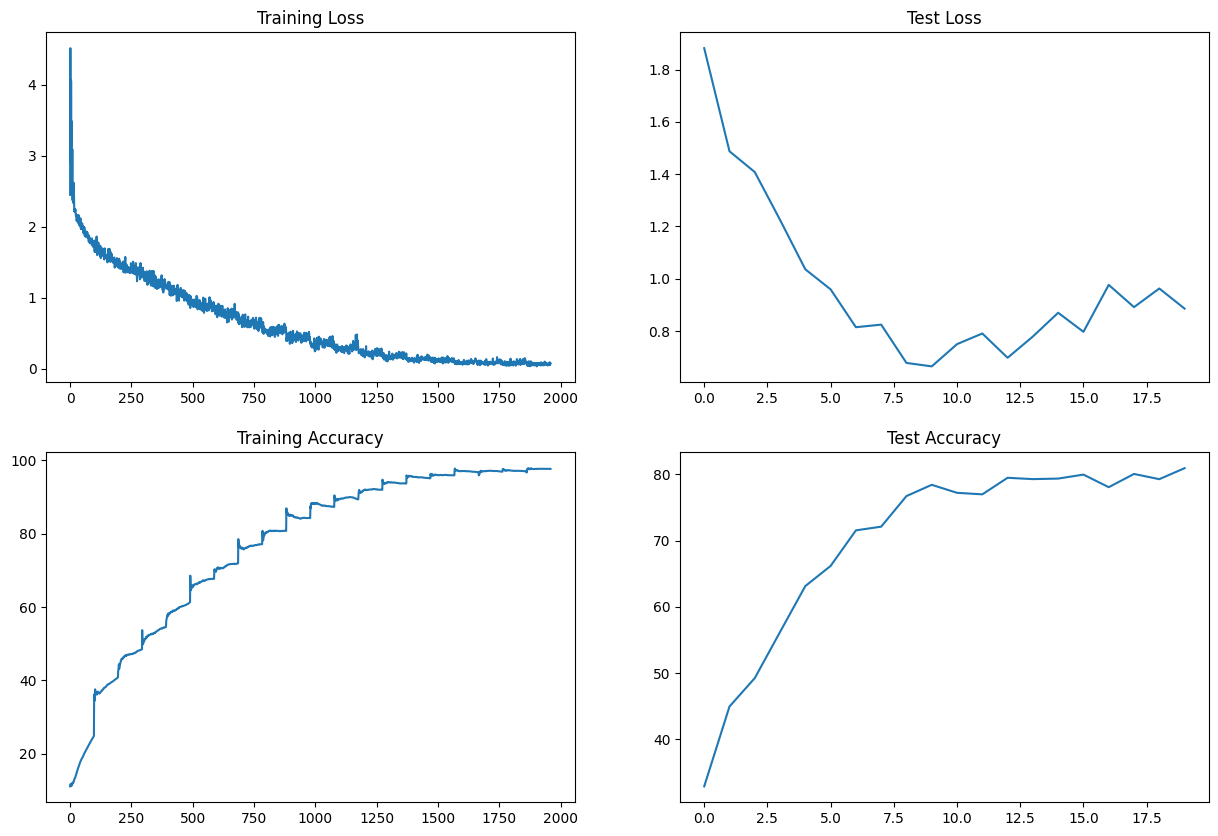

In [15]:
plot_losses(train_losses, test_losses, train_acc, test_acc)

In [7]:
misclassified = []
infer(model, device, infer_loader, misclassified, test_ds.class_to_idx)

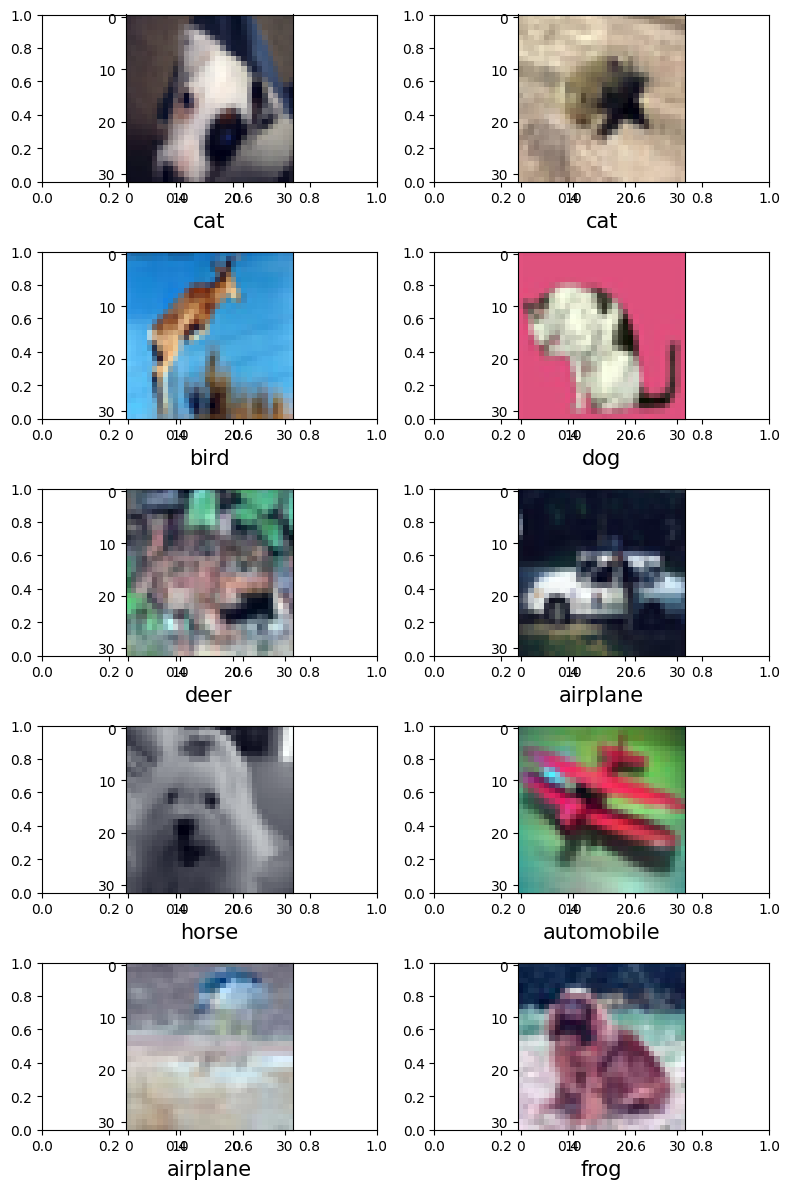

In [8]:
plot_misclassified(misclassified)

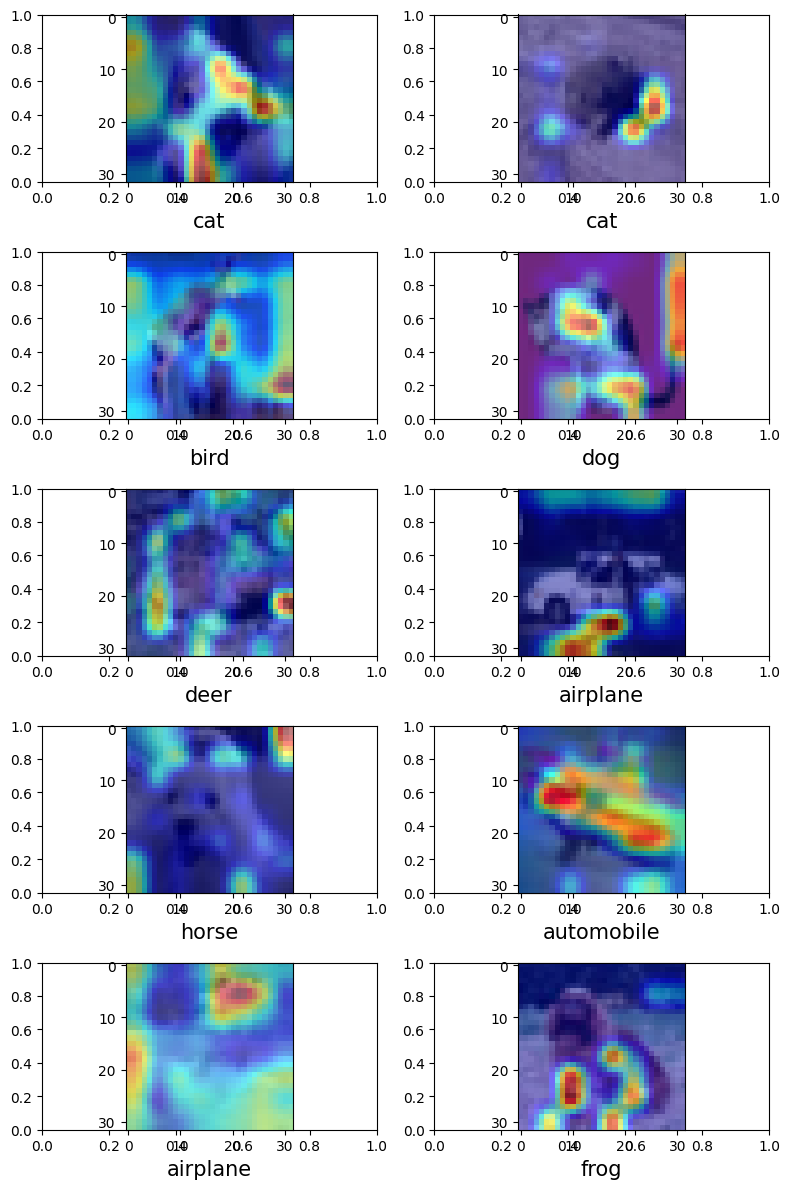

In [9]:
plot_misclassified_grad_cam_images(model, use_cuda=True, misclassified_images=misclassified)